<a href="https://colab.research.google.com/github/2021BUSTER/deep_learning_yeji/blob/main/16_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EC%9D%B8%EC%8B%9D_(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 전처리 과정


In [66]:
# 0~9까지의 10개의 클래스를 저장하고 있음 : mnist
from keras.datasets import mnist

(X_train, Y_class_train), (X_test,Y_class_test)=mnist.load_data()

print("학습셋 이미지 수: %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수: %d 개" % (X_test.shape[0]))


학습셋 이미지 수: 60000 개
테스트셋 이미지 수: 10000 개


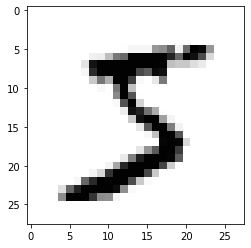

In [67]:
# 학습셋의 첫번째 이미지 show
import matplotlib.pyplot as plt
plt.imshow(X_train[0],cmap='Greys')
plt.show()

In [68]:
# 위의 이미지는 행렬로 저장되어 있음
#row=28 , column=28 28 X 28 = 784개의 데이터가 하나의 집합으로 이루어짐 
# 각 데이터는 0~255로 이뤄어짐 
import sys
for x in X_train[0]:
  for i in x:
    sys.stdout.write('%d\t' %i)
  sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [69]:
# 차원 변환 과정
# 2차원 배열을 784개의 1차원 배열로 바꿔줌 : reshape
X_train=X_train.reshape(X_train.shape[0],784)  # reshape(총 샘플 수 , 1차원 속성수)

In [70]:
# 정규화
#케라스는 0~1사이의 값으로 변환한 다음 구동할 때 최적의 성능을 보임으로 0~255데이터를 0~1로 변환

X_train=X_train.astype('float64') # 실수형으로 바꾸기
X_train=X_train/255

In [71]:
# X_test도 동일과정 진행

X_test=X_test.reshape(X_test.shape[0],784).astype('float64')/255

print("class : %d" %(Y_class_train[0]))  # 클래스 찍어 레이블 값 확인

class : 5


** 원-핫 인코딩 방식 적용**

분류문제를 해결하기 위함 ( 아이리스 품종 예측 문제에서 사용 )
  = 0~9까지의 정수형 값을 0 or 1로만 이루어진 벡터로 값 수정해야함
> class[5] => [0 0 0 0 0 1 0 0 0 0]   
> np_utils.to_categorial(클래스, 클래스의 개수)

In [72]:
# 바이러리화 과정
from keras.utils import np_utils

Y_train=np_utils.to_categorical(Y_class_train,10)
Y_test=np_utils.to_categorical(Y_class_test,10)
print(Y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# 프레임 만들기


In [63]:
#모델 프레임 설정
from keras.models import Sequential
from keras.layers import Dense

model=Sequential()
model.add(Dense(512,input_dim=784,activation='relu'))  # 은닉층 = 512개, input_dim (입력값) = 784개, 은닉층의 활성화 함수 = relu  
model.add(Dense(10,activation='softmax'))              # 출력 = 10개, 출력츠의 활성화 함수 = softmax
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])  # 딥러닝 실행 환경을 위한 오차 함수 = categorical_crossentropy, 최적화 함수 = adam

In [64]:
# 실행에 앞서 모델의 성과를 저장하고 모델의 최적화 단계에서 학습을 자동 중단하게끔 설정 (14장)
# 10회 이상 모델의 성과 향상이 없으면 자동으로 학습 종료

import os
from keras.callbacks import ModelCheckpoint, EarlyStopping

MODEL_DIR='./model/'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer=ModelCheckpoint(filepath=modelpath,monitor='val_loss',verbos=1,save_best_only=True)
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=10)

# 샘플 200개를 모두 30번 실행하게끔 설정
# 테스트셋으로 최종 모델의 성과를 측정해 그 값을 출력
history=model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=30,batch_size=200,verbose=0,callbacks=[early_stopping_callback,checkpointer])

print("\n Test Accuracy: %.4f" %(model.evaluate(X_test,Y_test)[1]))



313/313 [==============================] - 1s 2ms/step - loss: 0.0695 - accuracy: 0.9833

 Test Accuracy: 0.9833


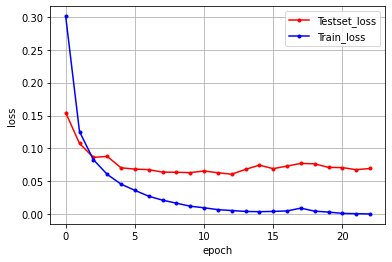

In [65]:
# 실행 결과를 그래프로 표현
# 학습셋의 오차를 그래프로 표현

y_vloss=history.history['val_loss']

#학습셋 오차
y_loss=history.history['loss']

#그래프로 표현
x_len=numpy.arange(len(y_loss))
plt.plot(x_len,y_vloss,marker='.',c="red",label='Testset_loss')
plt.plot(x_len,y_loss,marker='.',c="blue",label='Train_loss')

# 그래프에 그리드를 주고 레이블 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 테스트의 과적합이 일어나기 전 학습을 끝낸 모습

# 컨볼루션 신경망 (CNN) 
- 이미지 특징 추출

 : 입력된 이미지에서 다시 한번 특징을 추출하기 위해 마스크(필터, 윈도 or 커널)를 도입하는 기법

 MNIST 손글씨 인식률 높이기

> 컨볼루션 층 추가 : Conv2D()
 
- 첫번째 인자 : 마스크 적용할 개수    
- 두번째 인자 : 마스크(커널)의 크기 (행,열)   
- 세번재 인자 : 맨 처음 층에는 입력되는 값을 알려줘야 함  input_shape=(행,열,색상 or 흑백)    
- 네번째 인자 : 활성화 함수 정의 

> 컨볼루션은 1차원 배열을 다룸

### 맥스풀링 (of 풀링)
 - 축소 (= 풀링 or 서브 샘플링)

=> 컨볼루션 결과가 여전히 크고 복잡함으로 이를 축소해야 함으로 필요
> MacPooling2D()

> 맥스 풀링 : 정해진 구역 안에서 최대값을 뽑아냄 (보편적으로 사용)   
> 평균 풀링 : 정해진 구역 안에서 평균값을 뽑아냄

> 맥스풀링은 1차원 배열을 다룸

+ 드롭아웃, 플래튼

=> 은닉층에 배치된 노드 중 일부를 임의로 꺼줌으로 학습 데이터에 지자치게 치우쳐서 학습되는 과적합을 방지
> Dropout()


Epoch 00001: val_loss improved from inf to 0.05434, saving model to ./model/01-0.0543.hdf5

Epoch 00002: val_loss improved from 0.05434 to 0.03815, saving model to ./model/02-0.0381.hdf5

Epoch 00003: val_loss improved from 0.03815 to 0.03551, saving model to ./model/03-0.0355.hdf5

Epoch 00004: val_loss improved from 0.03551 to 0.03080, saving model to ./model/04-0.0308.hdf5

Epoch 00005: val_loss did not improve from 0.03080

Epoch 00006: val_loss improved from 0.03080 to 0.02844, saving model to ./model/06-0.0284.hdf5

Epoch 00007: val_loss did not improve from 0.02844

Epoch 00008: val_loss did not improve from 0.02844

Epoch 00009: val_loss did not improve from 0.02844

Epoch 00010: val_loss improved from 0.02844 to 0.02829, saving model to ./model/10-0.0283.hdf5

Epoch 00011: val_loss improved from 0.02829 to 0.02774, saving model to ./model/11-0.0277.hdf5

Epoch 00012: val_loss did not improve from 0.02774

Epoch 00013: val_loss improved from 0.02774 to 0.02570, saving model to

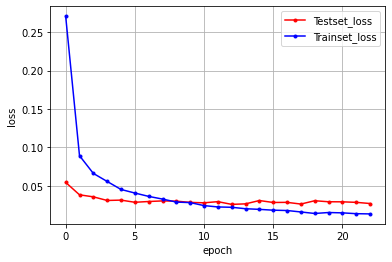

In [74]:
#-*- coding: utf-8 -*-

from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

# 데이터 불러오기

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

# 컨볼루션 신경망의 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
